Data preprocessing: <br>
1)Data Frame creation <br>
2)Merge the data into a single data frame based on the date <br>
3)Rename the column with the assets <br>
4)Check for null values <br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import jarque_bera
import cvxpy as cp
import seaborn as sns
import scipy.optimize as sco

In [ ]:
df_1=web.DataReader("^GSPC",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_2=web.DataReader("^RUT",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_3=web.DataReader("NDAQ",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_4=web.DataReader("LTC-USD",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_5=web.DataReader("ETH-USD",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_6=web.DataReader("BTC-USD",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_7=web.DataReader("HG=F",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_8=web.DataReader("CL=F",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']
df_9=web.DataReader("GC=F",data_source="yahoo",start="2018-1-1",end="2019-12-31")['Close']


In [ ]:
dfs = [df_1, df_2, df_3,df_4, df_5, df_6,df_7, df_8,df_9]  #
df = pd.concat(dfs, axis=1)

In [ ]:
df

,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,
2018-01-01,NaN,NaN,NaN,229.033005,772.640991,13657.200195,NaN,NaN,NaN
2018-01-02,2695.810059,1550.010010,76.739998,255.684006,884.443970,14982.099609,3.2560,60.369999,1313.699951
2018-01-03,2713.060059,1552.579956,77.660004,245.367996,962.719971,15201.000000,3.2370,61.630001,1316.199951
2018-01-04,2723.989990,1555.719971,78.690002,241.369995,980.921997,15599.200195,3.2425,62.009998,1319.400024
2018-01-05,2743.149902,1560.010010,79.209999,249.270996,997.719971,17429.500000,3.2070,61.439999,1320.300049
...,...,...,...,...,...,...,...,...,...
2019-12-28,NaN,NaN,NaN,42.842522,128.322708,7317.990234,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,43.670658,134.757980,7422.652832,NaN,NaN,NaN
2019-12-30,3221.290039,1664.150024,107.019997,42.747337,132.633484,7292.995117,2.8275,61.680000,1514.500000


In [ ]:
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')
print (df)

                  Close        Close  ...      Close        Close
Date                                  ...                        
2018-01-01          NaN          NaN  ...        NaN          NaN
2018-01-02  2695.810059  1550.010010  ...  60.369999  1313.699951
2018-01-03  2713.060059  1552.579956  ...  61.630001  1316.199951
2018-01-04  2723.989990  1555.719971  ...  62.009998  1319.400024
2018-01-05  2743.149902  1560.010010  ...  61.439999  1320.300049
...                 ...          ...  ...        ...          ...
2019-12-28          NaN          NaN  ...        NaN          NaN
2019-12-29          NaN          NaN  ...        NaN          NaN
2019-12-30  3221.290039  1664.150024  ...  61.680000  1514.500000
2019-12-31  3230.780029  1668.469971  ...  61.060001  1519.500000
2020-01-01          NaN          NaN  ...        NaN          NaN

[731 rows x 9 columns]


In [ ]:
df = df.fillna(method='ffill')

In [ ]:
df

,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,
2018-01-01,NaN,NaN,NaN,229.033005,772.640991,13657.200195,NaN,NaN,NaN
2018-01-02,2695.810059,1550.010010,76.739998,255.684006,884.443970,14982.099609,3.2560,60.369999,1313.699951
2018-01-03,2713.060059,1552.579956,77.660004,245.367996,962.719971,15201.000000,3.2370,61.630001,1316.199951
2018-01-04,2723.989990,1555.719971,78.690002,241.369995,980.921997,15599.200195,3.2425,62.009998,1319.400024
2018-01-05,2743.149902,1560.010010,79.209999,249.270996,997.719971,17429.500000,3.2070,61.439999,1320.300049
...,...,...,...,...,...,...,...,...,...
2019-12-28,3240.020020,1669.030029,107.989998,42.842522,128.322708,7317.990234,2.8365,61.720001,1513.800049
2019-12-29,3240.020020,1669.030029,107.989998,43.670658,134.757980,7422.652832,2.8365,61.720001,1513.800049
2019-12-30,3221.290039,1664.150024,107.019997,42.747337,132.633484,7292.995117,2.8275,61.680000,1514.500000


In [ ]:
df = df.fillna(method='bfill')

In [ ]:
df

,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,
2018-01-01,2695.810059,1550.010010,76.739998,229.033005,772.640991,13657.200195,3.2560,60.369999,1313.699951
2018-01-02,2695.810059,1550.010010,76.739998,255.684006,884.443970,14982.099609,3.2560,60.369999,1313.699951
2018-01-03,2713.060059,1552.579956,77.660004,245.367996,962.719971,15201.000000,3.2370,61.630001,1316.199951
2018-01-04,2723.989990,1555.719971,78.690002,241.369995,980.921997,15599.200195,3.2425,62.009998,1319.400024
2018-01-05,2743.149902,1560.010010,79.209999,249.270996,997.719971,17429.500000,3.2070,61.439999,1320.300049
...,...,...,...,...,...,...,...,...,...
2019-12-28,3240.020020,1669.030029,107.989998,42.842522,128.322708,7317.990234,2.8365,61.720001,1513.800049
2019-12-29,3240.020020,1669.030029,107.989998,43.670658,134.757980,7422.652832,2.8365,61.720001,1513.800049
2019-12-30,3221.290039,1664.150024,107.019997,42.747337,132.633484,7292.995117,2.8275,61.680000,1514.500000


In [ ]:
df.columns = ['^GSPC','^RUT','NSDQ','LTC-USD','ETH-USD','BTC-USD','HG=F','CL=F','^GC=F']

In [ ]:
df

,^GSPC,^RUT,NSDQ,LTC-USD,ETH-USD,BTC-USD,HG=F,CL=F,^GC=F
Date,,,,,,,,,
2018-01-01,2695.810059,1550.010010,76.739998,229.033005,772.640991,13657.200195,3.2560,60.369999,1313.699951
2018-01-02,2695.810059,1550.010010,76.739998,255.684006,884.443970,14982.099609,3.2560,60.369999,1313.699951
2018-01-03,2713.060059,1552.579956,77.660004,245.367996,962.719971,15201.000000,3.2370,61.630001,1316.199951
2018-01-04,2723.989990,1555.719971,78.690002,241.369995,980.921997,15599.200195,3.2425,62.009998,1319.400024
2018-01-05,2743.149902,1560.010010,79.209999,249.270996,997.719971,17429.500000,3.2070,61.439999,1320.300049
...,...,...,...,...,...,...,...,...,...
2019-12-28,3240.020020,1669.030029,107.989998,42.842522,128.322708,7317.990234,2.8365,61.720001,1513.800049
2019-12-29,3240.020020,1669.030029,107.989998,43.670658,134.757980,7422.652832,2.8365,61.720001,1513.800049
2019-12-30,3221.290039,1664.150024,107.019997,42.747337,132.633484,7292.995117,2.8275,61.680000,1514.500000


In [ ]:
means =[]
for col in df.columns:
  means.append(np.mean(df[col]))
means

[2829.1197915553394,
 1567.927513947076,
 91.13627907352473,
 87.65911453497557,
 332.36282131544704,
 7483.384654743075,
 2.8244001366371334,
 60.952311895451366,
 1330.1922024623802]

In [ ]:
stds = []
for col in df.columns:
  stds.append(np.std(df[col]))
stds

[155.9292908759267,
 81.23250050430687,
 7.504264586394741,
 51.15616552581634,
 262.3706414712537,
 2545.0158423134035,
 0.1947377455075782,
 6.646819339155534,
 97.607706838922]

In [ ]:
skews = []
for col in df.columns:
  skews.append(skew(df[col]))
skews

[0.2435175951862477,
 -0.2784469328537979,
 0.19988563384437602,
 1.3064471513000013,
 1.637425439274277,
 0.44138387890532227,
 0.6371750834513172,
 0.04354767944031408,
 0.5845970004098954]

In [ ]:
kerts = []
for col in df.columns:
  kerts.append(kurtosis(df[col]))
kerts

[0.1542973589413137,
 0.784320177680744,
 -0.7279349796608905,
 1.3654545134577543,
 2.0724264327436472,
 0.36489028361588804,
 -0.730429790362761,
 -0.6945557831094322,
 -0.7420653639233672]

In [ ]:
jbs = []
for col in df.columns:
  jbs.append(jarque_bera(df[col]))
jbs


[(7.949958568623608, 0.018779690524868164),
 (28.18275831783792, 7.589126446161387e-07),
 (21.007307466331063, 2.7436022090432388e-05),
 (264.73416783452217, 0.0),
 (457.471971024049, 0.0),
 (27.79090925615201, 9.231679776178225e-07),
 (65.7137331415196, 5.329070518200751e-15),
 (14.924380401315863, 0.0005743967486595558),
 (58.40920313391312, 2.0727863869751673e-13)]

Covariance Matrix and Mean Return

In [ ]:
returns=np.log(df/df.shift(1))
returns

,^GSPC,^RUT,NSDQ,LTC-USD,ETH-USD,BTC-USD,HG=F,CL=F,^GC=F
Date,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.000000,0.000000,0.000000,0.110076,0.135145,0.092589,0.000000,0.000000,0.000000
2018-01-03,0.006378,0.001657,0.011917,-0.041183,0.084803,0.014505,-0.005852,0.020657,0.001901
2018-01-04,0.004021,0.002020,0.013176,-0.016428,0.018730,0.025858,0.001698,0.006147,0.002428
2018-01-05,0.007009,0.002754,0.006586,0.032210,0.016980,0.110945,-0.011009,-0.009235,0.000682
...,...,...,...,...,...,...,...,...,...
2019-12-28,0.000000,0.000000,0.000000,0.039623,0.008673,0.003820,0.000000,0.000000,0.000000
2019-12-29,0.000000,0.000000,0.000000,0.019145,0.048932,0.014201,0.000000,0.000000,0.000000
2019-12-30,-0.005798,-0.002928,-0.009023,-0.021370,-0.015891,-0.017622,-0.003178,-0.000648,0.000462


In [ ]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov() 

No handles with labels found to put in legend.


Text(0, 0.5, 'price in USD')

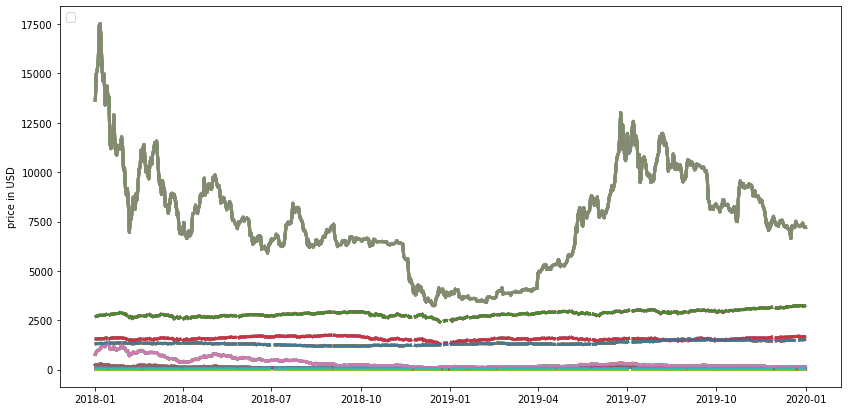

In [ ]:
plt.figure(figsize=(14, 7))
for i in df.columns.values:
    plt.plot(df.index, df[i], lw=3, alpha=0.8)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in USD')

No handles with labels found to put in legend.


Text(0, 0.5, 'daily returns')

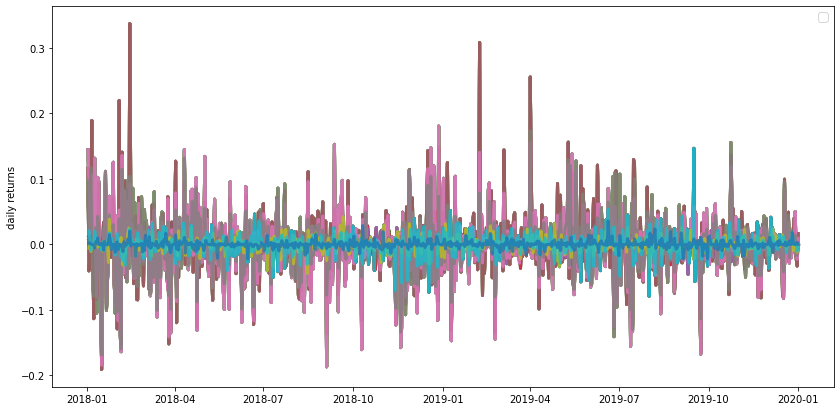

In [ ]:
returns = df.pct_change()
plt.figure(figsize=(14, 7))
for i in returns.columns.values:
    plt.plot(returns.index, returns[i], lw=3, alpha=0.8)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [ ]:
wkly_cov_matrix = cov_matrix*5 
#weekly return covariance matrix
#approximated by multiplying daily return covariance by 5

In [ ]:
wkly_cov_matrix

,^GSPC,^RUT,NSDQ,LTC-USD,ETH-USD,BTC-USD,HG=F,CL=F,^GC=F
^GSPC,0.000305,0.000307,0.000248,0.000137,0.000114,0.000076,0.000097,0.000154,-0.000020
^RUT,0.000307,0.000397,0.000225,0.000142,0.000108,0.000073,0.000117,0.000183,-0.000023
NSDQ,0.000248,0.000225,0.000507,0.000127,0.000047,0.000094,0.000071,0.000073,-0.000019
LTC-USD,0.000137,0.000142,0.000127,0.013963,0.010736,0.008231,0.000058,-0.000043,0.000130
ETH-USD,0.000114,0.000108,0.000047,0.010736,0.012206,0.007936,0.000079,0.000143,0.000142
BTC-USD,0.000076,0.000073,0.000094,0.008231,0.007936,0.007732,-0.000021,-0.000065,0.000102
HG=F,0.000097,0.000117,0.000071,0.000058,0.000079,-0.000021,0.000476,0.000190,0.000046
CL=F,0.000154,0.000183,0.000073,-0.000043,0.000143,-0.000065,0.000190,0.001346,0.000017
^GC=F,-0.000020,-0.000023,-0.000019,0.000130,0.000142,0.000102,0.000046,0.000017,0.000166


In [ ]:
yrly_cov_matrix = returns.cov()*250 
#yearly covariance matrix is approximated by 
#multiplying daily return covariance matrix by a factor of 250

In [ ]:
yrly_cov_matrix

,^GSPC,^RUT,NSDQ,LTC-USD,ETH-USD,BTC-USD,HG=F,CL=F,^GC=F
^GSPC,0.015259,0.015346,0.012391,0.006833,0.005689,0.003810,0.004827,0.007698,-0.001015
^RUT,0.015346,0.019839,0.011267,0.007119,0.005387,0.003634,0.005853,0.009171,-0.001147
NSDQ,0.012391,0.011267,0.025341,0.006353,0.002352,0.004702,0.003573,0.003650,-0.000944
LTC-USD,0.006833,0.007119,0.006353,0.698166,0.536812,0.411548,0.002918,-0.002137,0.006479
ETH-USD,0.005689,0.005387,0.002352,0.536812,0.610320,0.396822,0.003954,0.007142,0.007112
BTC-USD,0.003810,0.003634,0.004702,0.411548,0.396822,0.386603,-0.001071,-0.003274,0.005089
HG=F,0.004827,0.005853,0.003573,0.002918,0.003954,-0.001071,0.023791,0.009511,0.002291
CL=F,0.007698,0.009171,0.003650,-0.002137,0.007142,-0.003274,0.009511,0.067319,0.000849
^GC=F,-0.001015,-0.001147,-0.000944,0.006479,0.007112,0.005089,0.002291,0.000849,0.008318


In [ ]:
weekly_returns=returns.mean()*5
weekly_returns

^GSPC      0.001393
^RUT       0.000703
NSDQ       0.002537
LTC-USD   -0.004768
ETH-USD   -0.005991
BTC-USD   -0.000509
HG=F      -0.000810
CL=F       0.000749
^GC=F      0.001080
dtype: float64

In [ ]:
yrly_returns = returns.mean()*250
yrly_returns

^GSPC      0.069645
^RUT       0.035154
NSDQ       0.126859
LTC-USD   -0.238382
ETH-USD   -0.299565
BTC-USD   -0.025430
HG=F      -0.040521
CL=F       0.037434
^GC=F      0.053992
dtype: float64

In [ ]:
# Volatility is given by the weekly standard deviation. We multiply by sqrt(5) because there are 5 trading days/week.
weekly_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(5))
weekly_sd

^GSPC      0.017510
^RUT       0.019959
NSDQ       0.022541
LTC-USD    0.116631
ETH-USD    0.111523
BTC-USD    0.088240
HG=F       0.021816
CL=F       0.036644
^GC=F      0.012882
dtype: float64

In [ ]:
yrly_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
yrly_sd

^GSPC      0.123812
^RUT       0.141132
NSDQ       0.159392
LTC-USD    0.824704
ETH-USD    0.788585
BTC-USD    0.623948
HG=F       0.154264
CL=F       0.259115
^GC=F      0.091090
dtype: float64

In [ ]:
assets = pd.concat([yrly_returns, yrly_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
^GSPC,0.069645,0.123812
^RUT,0.035154,0.141132
NSDQ,0.126859,0.159392
LTC-USD,-0.238382,0.824704
ETH-USD,-0.299565,0.788585
BTC-USD,-0.025430,0.623948
HG=F,-0.040521,0.154264
CL=F,0.037434,0.259115
^GC=F,0.053992,0.091090


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 20000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, weekly_returns) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    week_sd = sd*np.sqrt(5) # Annual standard deviation = volatility
    p_vol.append(week_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
plt.figure(figsize=(14, 7))
for i in df.columns.values:
    plt.plot(df.index, df[i], lw=3, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in USD')
returns = df.pct_change()

plt.figure(figsize=(14, 7))
for i in returns.columns.values:
    plt.plot(returns.index, returns[i], lw=3, alpha=0.8,label=i)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,^GSPC weight,^RUT weight,NSDQ weight,LTC-USD weight,ETH-USD weight,BTC-USD weight,HG=F weight,CL=F weight,^GC=F weight
0,-0.001496,0.051098,0.117507,0.022479,0.075062,0.192383,0.188310,0.113103,0.021771,0.110344,0.159040
1,-0.001342,0.038560,0.148632,0.136773,0.061711,0.093303,0.242066,0.007637,0.109809,0.090328,0.109740
2,-0.000737,0.043809,0.010727,0.026102,0.089155,0.237827,0.017241,0.167866,0.045135,0.228290,0.177656
3,-0.000414,0.025882,0.141063,0.056749,0.047397,0.023402,0.130416,0.078022,0.180220,0.188619,0.154111
4,-0.000201,0.026603,0.073206,0.020468,0.254175,0.086844,0.092244,0.055252,0.200828,0.118810,0.098174


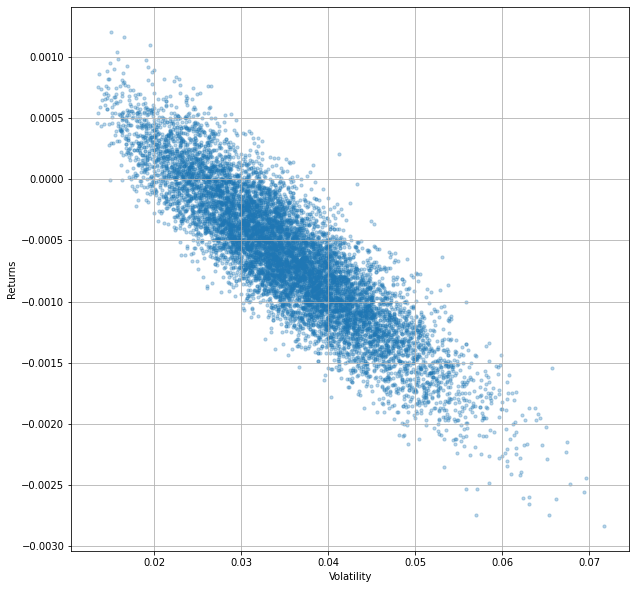

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.000464
Volatility        0.013378
^GSPC weight      0.123683
^RUT weight       0.146587
NSDQ weight       0.075073
LTC-USD weight    0.003022
ETH-USD weight    0.001222
BTC-USD weight    0.063025
HG=F weight       0.292062
CL=F weight       0.091731
^GC=F weight      0.203596
Name: 7529, dtype: float64

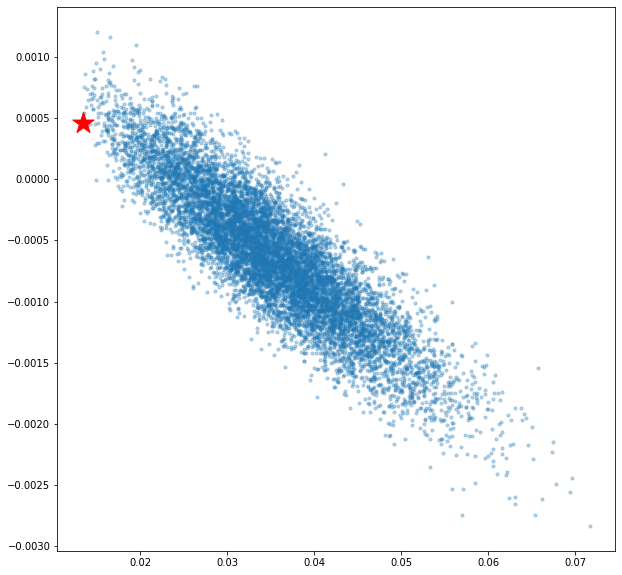

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# Finding the optimal portfolio
rf = 0.00 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           0.001208
Volatility        0.015014
^GSPC weight      0.246414
^RUT weight       0.088869
NSDQ weight       0.293635
LTC-USD weight    0.017233
ETH-USD weight    0.016030
BTC-USD weight    0.049322
HG=F weight       0.011315
CL=F weight       0.087827
^GC=F weight      0.189355
Name: 9077, dtype: float64

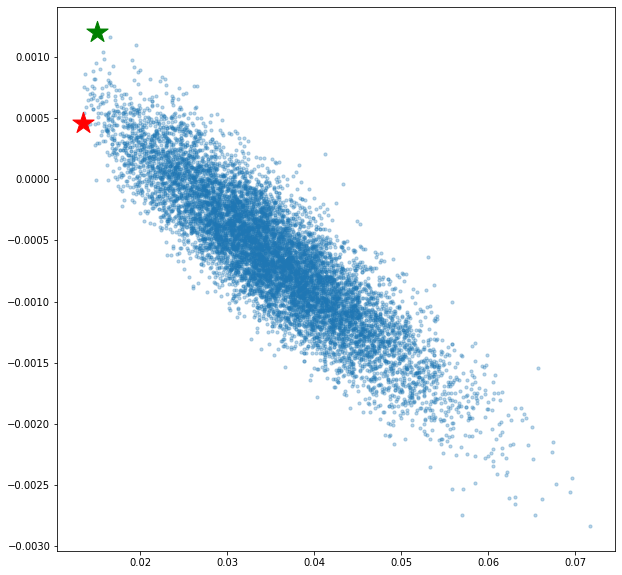

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

##Mrokowitz Portfolio Optimization Model

In the below section we are doing the Markowitz Model for the cryptocurrency optimization problem. The Markowitz Model uses a method of convex optimization with linear constraints. Therefore, we used CVXPY in our Markowitz Model Building. CVXPY is a Python package that is designed specifically for convex optimization porblems, similar to its Matlab version. We are going to maximize return given the risk constraints. The linear constraints are listed in the constraints array. In the model, we first designed the appropriate object fuction. Then we defined the corresponding linear constraints used during optimization. Finally, we run the model several iterations, finding results for different risk aversion coefficients. <br>
Credit sources: part of the model referred the example of the part "CVXPY for portfolio optimization", which is listed on CVXPY website under "basic examples" section. https://www.cvxpy.org/examples/index.html

In [ ]:
n=9

w = cp.Variable(n)
#w is the weight of the 9 assets

A = np.matrix(yrly_returns)
ret = A@w 
gamma = cp.Parameter(nonneg=True)
Sigma = yrly_cov_matrix.to_numpy()
risk = cp.quad_form(w, Sigma)


print("yrly_returns", yrly_returns)

#Maximize return while subjecting to the risk constraints.
#This is the objective function of our Markowitz model
objective = cp.Maximize(ret-gamma*risk)  
#This is the constraints array of our model
constraints = [w >=-1, w<=1, cp.sum(w) == 1] 
#This is the problem, comprised of the objective 
#and the constraints defined in previous lines.
prob = cp.Problem(objective, constraints)


yrly_returns ^GSPC      0.069645
^RUT       0.035154
NSDQ       0.126859
LTC-USD   -0.238382
ETH-USD   -0.299565
BTC-USD   -0.025430
HG=F      -0.040521
CL=F       0.037434
^GC=F      0.053992
dtype: float64


In [ ]:
Sigma

array([[ 0.01525863,  0.01534647,  0.01239115,  0.00683302,  0.00568916,
         0.00381001,  0.004827  ,  0.0076976 , -0.001015  ],
       [ 0.01534647,  0.01983851,  0.01126654,  0.00711863,  0.0053865 ,
         0.00363398,  0.00585337,  0.00917081, -0.00114678],
       [ 0.01239115,  0.01126654,  0.02534093,  0.00635274,  0.00235239,
         0.00470172,  0.00357309,  0.00364982, -0.00094394],
       [ 0.00683302,  0.00711863,  0.00635274,  0.6981657 ,  0.53681247,
         0.41154783,  0.00291752, -0.00213685,  0.00647942],
       [ 0.00568916,  0.0053865 ,  0.00235239,  0.53681247,  0.61032031,
         0.39682179,  0.00395398,  0.00714213,  0.00711241],
       [ 0.00381001,  0.00363398,  0.00470172,  0.41154783,  0.39682179,
         0.38660323, -0.00107123, -0.00327428,  0.00508852],
       [ 0.004827  ,  0.00585337,  0.00357309,  0.00291752,  0.00395398,
        -0.00107123,  0.0237907 ,  0.00951126,  0.00229055],
       [ 0.0076976 ,  0.00917081,  0.00364982, -0.00213685,  0

In [ ]:
# Compute the trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES) #the arrays that stores the risk and ret values
ret_data = np.zeros(SAMPLES)  #useful for plotting in the next few lines
weights = []  #the array that stores the asset weights
gamma_vals = np.logspace(-2,3, num=SAMPLES) 

for i in range(SAMPLES): #calculate 100 samples results from our markowitz model.
    gamma.value = gamma_vals[i]
    prob.solve() 
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value  
    weights.append(w.value) 

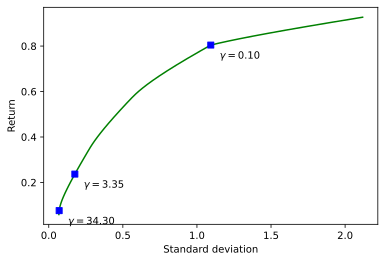

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [20,50,70]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.06, ret_data[marker]-.06))
plt.xlabel('Standard deviation')
plt.ylabel('Return')
#plt.axvline(x=0.1057)
plt.show()

We dig further to find more insights from the results. The 99th element of the ret_data is the safest portfolio we can get from the portfolio optimizer. We can see that it assigns more weights to the assets that has relatively low volatilities.

In [ ]:
print(ret_data[99])
print(weights[99])

1.599719523886089
[ 1.         -0.56743207 -1.          0.76582631 -0.0503794  -1.
  0.16187588  0.69010928  1.        ]
^GSPC      0.154031
^RUT       0.177573
NSDQ       0.174976
LTC-USD    0.846064
ETH-USD    0.783218
BTC-USD    0.460559
HG=F       0.150562
CL=F       0.261984
^GC=F      0.078454
dtype: float64


## The Four Phases Markowitz Portfolio Optimization Model

In this section, we build four Markowitz Optimization Model for the four phases of financial markets to get more insights of cryptocurrency portfolio investments.<br>
Credit sources: part of the model referred the example of the part "CVXPY for portfolio optimization", which is listed on CVXPY website under "basic examples" section. https://www.cvxpy.org/examples/index.html

Yearly Return and Volatility

In [ ]:
assets = pd.concat([yrly_returns, yrly_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
^GSPC,0.066617,0.154031
^RUT,0.024326,0.177573
NSDQ,-0.073347,0.174976
LTC-USD,1.542356,0.846064
ETH-USD,0.674975,0.783218
BTC-USD,0.077406,0.460559
HG=F,0.125942,0.150562
CL=F,0.377610,0.261984
^GC=F,0.122814,0.078454


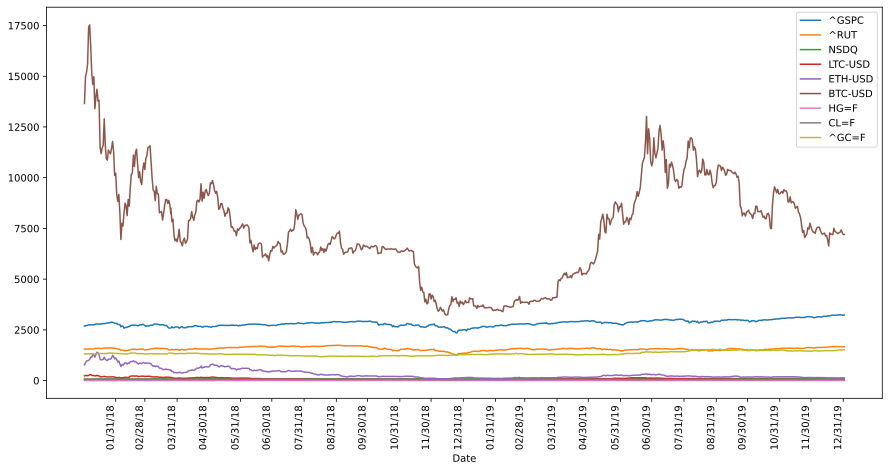

In [ ]:

import datetime
xticks = pd.date_range(datetime.datetime(2018,1,1), datetime.datetime(2019,12,31),freq='M')
fig, ax = plt.subplots(figsize=(15,8))
df.plot(ax=ax,xticks=xticks.to_pydatetime())
ax.set_xticklabels([x.strftime('%D') for x in xticks]); 
plt.xticks(rotation=90);

###Phase 1:  Markdown

In [ ]:
ph1_df = df["2018.1.1":"2018.11.30"]

In [ ]:
ph1_df

,^GSPC,^RUT,NSDQ,LTC-USD,ETH-USD,BTC-USD,HG=F,CL=F,^GC=F
Date,,,,,,,,,
2018-01-01,2695.810059,1550.010010,76.739998,229.033005,772.640991,13657.200195,3.2560,60.369999,1313.699951
2018-01-02,2695.810059,1550.010010,76.739998,255.684006,884.443970,14982.099609,3.2560,60.369999,1313.699951
2018-01-03,2713.060059,1552.579956,77.660004,245.367996,962.719971,15201.000000,3.2370,61.630001,1316.199951
2018-01-04,2723.989990,1555.719971,78.690002,241.369995,980.921997,15599.200195,3.2425,62.009998,1319.400024
2018-01-05,2743.149902,1560.010010,79.209999,249.270996,997.719971,17429.500000,3.2070,61.439999,1320.300049
...,...,...,...,...,...,...,...,...,...
2018-11-26,2673.449951,1505.959961,89.430000,29.410999,108.334999,3779.129883,2.7585,51.630001,1220.199951
2018-11-27,2682.169922,1492.859985,89.459999,31.068800,110.010002,3820.719971,2.7105,51.560001,1211.199951
2018-11-28,2743.790039,1530.380005,89.930000,34.626598,122.438004,4257.419922,2.7960,50.290001,1221.400024


In [ ]:

returns = ph1_df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov() 
yrly_cov_matrix = returns.cov()*250 
yrly_sd = ph1_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
yrly_returns = returns.mean()*250

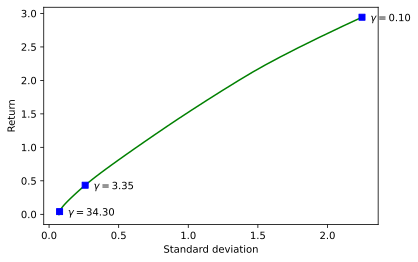

In [ ]:
n=9
# Construct the problem.
#n=9, initialize 9 variables for the weights of 9 different assets.
w = cp.Variable(n)
#w is the weight of the 9 assets

A = np.matrix(yrly_returns)
ret = A@w 
gamma = cp.Parameter(nonneg=True)
Sigma = yrly_cov_matrix.to_numpy()
risk = cp.quad_form(w, Sigma)




#maximize return while subjecting to the risk constraints.
#this is the objective function of our Markowitz model
objective = cp.Maximize(ret-gamma*risk)  
#this is the constraints array of our model
constraints = [w >=-1, w<=1, cp.sum(w) == 1] 
#this is the problem, comprised of the objective 
#and the constraints defined in previous lines.
prob = cp.Problem(objective, constraints)

# Compute the trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES) #the arrays that stores the risk and ret values
ret_data = np.zeros(SAMPLES)  #useful for plotting in the next few lines
weights = []  #the array that stores the asset weights
gamma_vals = np.logspace(-2,3, num=SAMPLES) 

for i in range(SAMPLES): #calculate 100 samples results from our markowitz model.
    gamma.value = gamma_vals[i]
    prob.solve() 
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value  
    weights.append(w.value) 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [20, 50, 70]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.06, ret_data[marker]-.06))
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

In [ ]:
print(ret_data[50])

print(weights[50])


1.599719523886089
[ 1.         -0.56743207 -1.          0.76582631 -0.0503794  -1.
  0.16187588  0.69010928  1.        ]


,Returns,Volatility
^GSPC,0.066617,0.154031
^RUT,0.024326,0.177573
NSDQ,-0.073347,0.174976
LTC-USD,1.542356,0.846064
ETH-USD,0.674975,0.783218
BTC-USD,0.077406,0.460559
HG=F,0.125942,0.150562
CL=F,0.377610,0.261984
^GC=F,0.122814,0.078454


###Phase 2: Accumulation

In [ ]:
ph2_df = df["2018.12.1":"2019.3.31"]
returns = ph2_df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov() 
yrly_cov_matrix = returns.cov()*250 
yrly_sd = ph2_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
yrly_returns = returns.mean()*250

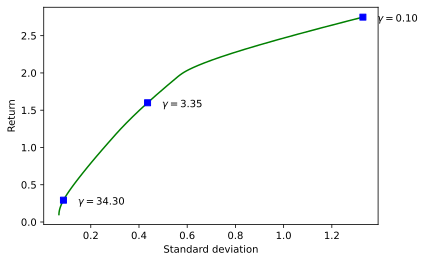

In [ ]:
n=9
# Construct the problem.
#n=9, initialize 9 variables for the weights of 9 different assets.
w = cp.Variable(n)
#w is the weight of the 9 assets

A = np.matrix(yrly_returns)
ret = A@w 
gamma = cp.Parameter(nonneg=True)
Sigma = yrly_cov_matrix.to_numpy()
risk = cp.quad_form(w, Sigma)




#maximize return while subjecting to the risk constraints.
#this is the objective function of our Markowitz model
objective = cp.Maximize(ret-gamma*risk)  
#this is the constraints array of our model
constraints = [w >=-1, w<=1, cp.sum(w) == 1] 
#this is the problem, comprised of the objective 
#and the constraints defined in previous lines.
prob = cp.Problem(objective, constraints)

# Compute the trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES) #the arrays that stores the risk and ret values
ret_data = np.zeros(SAMPLES)  #useful for plotting in the next few lines
weights = []  #the array that stores the asset weights
gamma_vals = np.logspace(-2,3, num=SAMPLES) 

for i in range(SAMPLES): #calculate 100 samples results from our markowitz model.
    gamma.value = gamma_vals[i]
    prob.solve() 
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value  
    weights.append(w.value) 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [20, 50, 70]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.06, ret_data[marker]-.06))
plt.xlabel('Standard deviation')
plt.ylabel('Return')
#plt.axvline(x=0.1057)
plt.show()

In [ ]:
print(ret_data[50])

print(weights[50])

1.599719523886089
[ 1.         -0.56743207 -1.          0.76582631 -0.0503794  -1.
  0.16187588  0.69010928  1.        ]


###Phase 3: Markup

In [ ]:
ph3_df = df["2019.4.1":"2019.6.30"]
returns = ph3_df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov() 
yrly_cov_matrix = returns.cov()*250 
yrly_sd = ph3_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
yrly_returns = returns.mean()*250

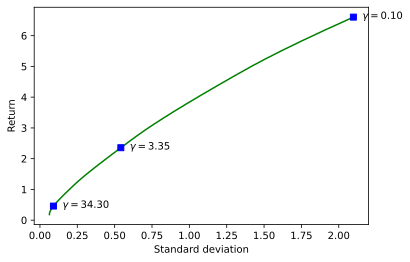

In [ ]:
n=9
# Construct the problem.
#n=9, initialize 9 variables for the weights of 9 different assets.
w = cp.Variable(n)
#w is the weight of the 9 assets

A = np.matrix(yrly_returns)
ret = A@w 
gamma = cp.Parameter(nonneg=True)
Sigma = yrly_cov_matrix.to_numpy()
risk = cp.quad_form(w, Sigma)



#maximize return while subjecting to the risk constraints.
#this is the objective function of our Markowitz model
objective = cp.Maximize(ret-gamma*risk)  
#this is the constraints array of our model
constraints = [w >=-1, w<=1, cp.sum(w) == 1] 
#this is the problem, comprised of the objective 
#and the constraints defined in previous lines.
prob = cp.Problem(objective, constraints)

# Compute the trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES) #the arrays that stores the risk and ret values
ret_data = np.zeros(SAMPLES)  #useful for plotting in the next few lines
weights = []  #the array that stores the asset weights
gamma_vals = np.logspace(-2,3, num=SAMPLES) 

for i in range(SAMPLES): #calculate 100 samples results from our markowitz model.
    gamma.value = gamma_vals[i]
    prob.solve() 
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value  
    weights.append(w.value) 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [20, 50, 70]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.06, ret_data[marker]-.06))
plt.xlabel('Standard deviation')
plt.ylabel('Return')
#plt.axvline(x=0.1057)
plt.show()

In [ ]:
print(ret_data[50])

print(weights[50])

2.356140175820363
[ 1.          0.00148639 -0.04901947 -0.13573501 -0.03787446  0.86367572
 -1.         -0.64253317  1.        ]


###Phase 4: Distribution

In [ ]:
ph4_df = df["2019.7.1":"2019.12.31"]
returns = ph4_df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov() 
yrly_cov_matrix = returns.cov()*250 
yrly_sd = ph4_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
yrly_returns = returns.mean()*250

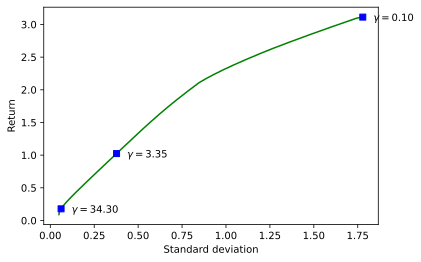

In [ ]:
n=9
# Construct the problem.
#n=9, initialize 9 variables for the weights of 9 different assets.
w = cp.Variable(n)
#w is the weight of the 9 assets

A = np.matrix(yrly_returns)
ret = A@w 
gamma = cp.Parameter(nonneg=True)
Sigma = yrly_cov_matrix.to_numpy()
risk = cp.quad_form(w, Sigma)



#maximize return while subjecting to the risk constraints.
#this is the objective function of our Markowitz model
objective = cp.Maximize(ret-gamma*risk)  
#this is the constraints array of our model
constraints = [w >=-1, w<=1, cp.sum(w) == 1] 
#this is the problem, comprised of the objective 
#and the constraints defined in previous lines.
prob = cp.Problem(objective, constraints)

# Compute the trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES) #the arrays that stores the risk and ret values
ret_data = np.zeros(SAMPLES)  #useful for plotting in the next few lines
weights = []  #the array that stores the asset weights
gamma_vals = np.logspace(-2,3, num=SAMPLES) 

for i in range(SAMPLES): #calculate 100 samples results from our markowitz model.
    gamma.value = gamma_vals[i]
    prob.solve() 
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value  
    weights.append(w.value) 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [20, 50, 70]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.06, ret_data[marker]-.06))
plt.xlabel('Standard deviation')
plt.ylabel('Return')
#plt.axvline(x=0.1057)
plt.show()

In [ ]:
print(ret_data[50])

print(weights[50])

1.0241386043268708
[ 0.46204576 -0.05768973  0.37709269 -0.74371656 -0.13935743  0.56515154
 -0.33355189  0.05299226  0.81703337]


##Sources and References: <br>
[1] "CVXPY for portfolio optimization", https://www.cvxpy.org/examples/index.html <br>
ORIE 5370, Optimization Modeling in Finance, Lecture Slides


[2] Dash.S.: https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/*italicized text*